# Training a Network Lab

### Introduction

In this lesson, we'll work with a fashion dataset once more.  In working through this lesson, try to only look at past readings if necessary.  The purpose of this lab is to become more familiar with the Pytorch library.

### Loading the Data

We'll begin by loading up the torch and torchvision modules.

In [267]:
import torch
from torchvision import transforms, datasets

Now let's download the FashionMNIST dataset using the `datasets` module.  In the `transform` argument set the following:

```python
transforms.Compose([transforms.ToTensor()])
```

In [268]:
train = None

> Check that we downloaded the data properly.

In [261]:
train
# Dataset FashionMNIST
#     Number of datapoints: 60000
#     Root location: 
#     Split: Train
#     StandardTransform
# Transform: Compose(
#                ToTensor()
#            )

Then download the test data.  Apply the same transformation on the data.

In [262]:
test = None

> Next, check that the split says `test` for our test data.

In [263]:
test

# Dataset FashionMNIST
#     Number of datapoints: 10000
#     Root location: 
#     Split: Test
#     StandardTransform
# Transform: Compose(
#                ToTensor()
#            )

### Exploring the Data

Next let's explore our training data.  Our training data consists of the `data` and the `targets`.  Take a look at the first 10 ten targets in our training data.

In [ ]:


# tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])

We can see what some of the these values equal with the `class_to_idx` method.  Display a dictionary of the clothing items indicated by each target value below.

In [265]:


# {'T-shirt/top': 0,
#  'Trouser': 1,
#  'Pullover': 2,
#  'Dress': 3,
#  'Coat': 4,
#  'Sandal': 5,
#  'Shirt': 6,
#  'Sneaker': 7,
#  'Bag': 8,
#  'Ankle boot': 9}

Ok, so it looks like here we are asked to identify images of different clothing items.  Let's use matplotlib to display our first image from the training data below.  (We may have to reshape our observation.)

In [266]:
from matplotlib.pyplot import imshow

# imshow()

<img src="./fashion-img.png" width="40%">

And let's identify what the target is.

> Reference the target from the `train` variable.

In [228]:


# 9

9

So this is an `Ankle Boot`, apparently.

We want to train our data in batches of $50$, so import the DataLoader from `torch.utils.data` so we can do so.  Do this for both the training and test data.

In [183]:
torch.manual_seed(12)

trainset = None
testset = None

In [184]:
trainset.batch_size, testset.batch_size
# (50, 50)

(50, 50)

### Building a Network

Now it's time to build out our neural network.  The network should match the following specifications:

* 4 linear layers 
* Where each linear layer consists of 64 neurons
* And the predictions should be made with the `log_softmax` function.  

Ok, get going.

> We'll import the necessary libraries for you.

In [185]:
import torch.nn.functional as F
import torch.nn as nn

Define a class called `Net` below.

In [269]:
from torch import nn
import torch.nn.functional as F
class Net():
    pass

Check that the neural net was defined properly below.

In [233]:
torch.manual_seed(12)

net = Net()
net

# Net(
#   (W1): Linear(in_features=784, out_features=64, bias=True)
#   (W2): Linear(in_features=64, out_features=64, bias=True)
#   (W3): Linear(in_features=64, out_features=64, bias=True)
#   (W4): Linear(in_features=64, out_features=10, bias=True)
# )

Net(
  (W1): Linear(in_features=784, out_features=64, bias=True)
  (W2): Linear(in_features=64, out_features=64, bias=True)
  (W3): Linear(in_features=64, out_features=64, bias=True)
  (W4): Linear(in_features=64, out_features=10, bias=True)
)

Next, we'll select the first observation from the trainset.

In [234]:
first_observation = trainset.dataset[0][0]

first_observation.shape

torch.Size([1, 28, 28])

Reshape the data so that there are 784 features.

In [235]:
reshaped_obs = None
reshaped_obs.shape
# torch.Size([1, 784])

torch.Size([1, 784])

Now make a prediction with that first observation.

In [236]:
# make prediction here

# tensor([[-2.5293, -2.9463, -2.5804, -2.4731, -2.2488, -1.7802, -2.5763, -2.2842,
#          -1.8583, -2.3056]], grad_fn=<LogSoftmaxBackward>)


tensor([[-2.5293, -2.9463, -2.5804, -2.4731, -2.2488, -1.7802, -2.5763, -2.2842,
         -1.8583, -2.3056]], grad_fn=<LogSoftmaxBackward>)

We can see that there are ten outputs for the first observation.

In [237]:
net(reshaped_obs).shape

# torch.Size([1, 10])

torch.Size([1, 10])

Use the `torch.exp` function to convert this first prediction to probabilities.

In [239]:


# tensor([[0.0797, 0.0525, 0.0757, 0.0843, 0.1055, 0.1686, 0.0761, 0.1019, 0.1559,
#          0.0997]], grad_fn=<ExpBackward>)


tensor([[0.0797, 0.0525, 0.0757, 0.0843, 0.1055, 0.1686, 0.0761, 0.1019, 0.1559,
         0.0997]], grad_fn=<ExpBackward>)

### Training a Neural Network

Now it's time to train our neural network.  To do so, we'll first need to initialize an optimizer and a loss function.  For the loss function, initialize cross entropy loss from the `nn` module.

In [240]:
x_loss = None
x_loss
# CrossEntropyLoss()

CrossEntropyLoss()

For the optimizer, use the Adam optimizer.

> Set the learning rate to `.0005` and pass through the params from the neural network.

In [243]:
import torch.optim as optim
adam = None
adam
# Adam (
# Parameter Group 0
#     amsgrad: False
#     betas: (0.9, 0.999)
#     eps: 1e-08
#     lr: 0.0005
#     weight_decay: 0
# )

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.0005
    weight_decay: 0
)

Ok, now it's time to write a training loop for the neural network.

Perform the following steps.

In [245]:
# move through the dataset 8 times

# divide the training set into X_batch and y_batch

# zero the gradient

# reshape the data so it each observation in a batch has 784 features

# make a prediction with the data

# calculate the loss

# perform backward propagation

# use the optimizer to step

# print the loss at the end of each epoch


    
# tensor(0.9880, grad_fn=<NllLossBackward>)
# tensor(0.5534, grad_fn=<NllLossBackward>)
# tensor(0.4873, grad_fn=<NllLossBackward>)
# tensor(0.3413, grad_fn=<NllLossBackward>)
# tensor(0.3580, grad_fn=<NllLossBackward>)
# tensor(0.5083, grad_fn=<NllLossBackward>)
# tensor(0.2989, grad_fn=<NllLossBackward>)
# tensor(0.3683, grad_fn=<NllLossBackward>)

tensor(0.9880, grad_fn=<NllLossBackward>)
tensor(0.5534, grad_fn=<NllLossBackward>)
tensor(0.4873, grad_fn=<NllLossBackward>)
tensor(0.3413, grad_fn=<NllLossBackward>)
tensor(0.3580, grad_fn=<NllLossBackward>)
tensor(0.5083, grad_fn=<NllLossBackward>)
tensor(0.2989, grad_fn=<NllLossBackward>)
tensor(0.3683, grad_fn=<NllLossBackward>)


### Evaluating our Neural Network

Now let's get a sense of how our neural network performed.  First make  predictions on the observations in the testset.

> We may need to call `float` on our testset to pass through the correct type of data.

In [270]:
predictions_test = None

In [248]:
torch.exp(predictions_test[:1])

# tensor([[4.4961e-08, 1.2412e-05, 4.5766e-09, 9.3961e-07, 1.2311e-06, 9.5997e-04,
#          4.3604e-08, 4.5264e-03, 2.0135e-05, 9.9448e-01]],
#        grad_fn=<ExpBackward>)

tensor([[4.4961e-08, 1.2412e-05, 4.5766e-09, 9.3961e-07, 1.2311e-06, 9.5997e-04,
         4.3604e-08, 4.5264e-03, 2.0135e-05, 9.9448e-01]],
       grad_fn=<ExpBackward>)

We can see that the highest probability is for the last class, 9.

Next, use the `argmax` function to see the labels predicted for each observation.  

> Use `axis = 1`.

In [249]:
hard_predictions = None

In [250]:
hard_predictions[:10]

# tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

Let's take a look at our neural network in action.  This is our fifth image in the test set.

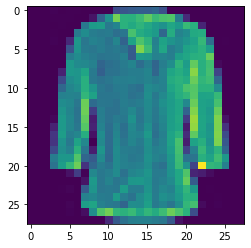

In [255]:
imshow(test[4][0].view(28, 28))

In [256]:
hard_predictions[4]

# tensor(6)

tensor(6)

In [257]:
test.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

Looking good so far.  Next, check the accuracy of our neural network on our testset.

In [258]:




# 0.8303

0.8303

So we can see that our neural network identifies $.83$ of the data correctly.

### Summary

In this lesson, we trained a neural network in Pytorch.  Nice work!!